<a href="https://colab.research.google.com/github/Mark12481632/Imperial_MSc_Project/blob/main/Copy_of_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MSc Project: Data Preperation

My research project is intending to use a Graphical Neural Network (GNN) to predict the solubility, in water, of small organic molecules.
<BR><BR>


**This script was run in Google's Colab environment.**



---


**Section 1: Installation of the required packages.**

One of the reasons I used Google's Colab for running this script was because I had problems installing RDKit on my Apple PC.  I was lucky enough to find guidance for its installation on Colab on the Internet.
<BR><BR>

As a prerequisite for RDKit Condacolab was needed.


In [27]:
# This code is only run once.  Configures a space for the libraries that must be installed.

import os, sys
from google.colab import drive

drive.mount('/content/gdrive')
nb_path = '/content/notebooks'

"""
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
"""

sys.path.insert(0, nb_path)  # or append(nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
# This cell imports/downloads the libraries we need - just once!

## %%capture

# Install CONDACOLAB
!pip install --target=$nb_path -q condacolab
import condacolab
condacolab.install()

# Install RDKIT
!conda install --target=$nb_path -c rdkit rdkit

# Install pytorch-geometric
!pip install --target=$nb_path torch_geometric

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/shutil.py", line 816, in move
    os.rename(src, real_dst)
OSError: [Errno 107] Transport endpoint is not connected: '/tmp/pip-target-pni_8ukw/lib/python/condacolab-0.1.7.dist-info' -> '/content/notebooks/condacolab-0.1.7.dist-info'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/commands/install.py", line 566, in run
    self._handle_target_dir(
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/commands/install.py", line 625, in _handle_target_dir
    shutil.move(os.path.join(lib_dir, item

In [23]:
# Standard libraries:

import numpy as np
import pandas as pd

from rdkit import Chem



---


**Section 2: Loading and examining the ESOL dataset**<BR>

- The ESOL dataset has already been downloaded into the github repository - we
  can load it using Pandas.
- Remove the column "ESOL predicted log solubility in mols per litre" as this is the result of another regression model.
<BR><BR>

The column descriptions follow:

1.   **Compound ID:** Name of the compund.
2.   **ESOL predicted log solubility in mols per litre:** Predicted solubility using a regression model - we will remove this.
3.   **Minimum Degree:** The minimum number of bonds that any atom in the molecule has with other atoms.
4.   **Molecular Weight:** The molecular weight of the molecule.
5.   **Number of H-Bond Donors:** A count of the number of hydrogen bond donor groups in the molecule. H-bond donors are atoms (usually hydrogen) that can donate hydrogen bonds to other atoms.
6.   **Number of Rings:** Number of "ring"s, where a "ring" represents a closed cycle of atoms.
7.   **Number of Rotatable Bonds:** A rotatable bond is normally a single bond and that allows the molecule to take on different "forms" by rotation about said bond.
8.   **Polar Surface Area:** Identifies a measure of exposed polar area of a molecule which can provide insights into a molecules polarity.
9.   **measured log solubility in mols per litre:** The logorithm of the solubility of the molecule (in mols/litre)
10.  **smiles:** The SMILES representation of the molecule - see references above.



In [13]:
# 2. Load the "ESOL" dataset and show attributes.

github_esol_url = "https://raw.githubusercontent.com/Mark12481632/Imperial_MSc_Project/main/chem_data/esol_raw.csv"
esol_data_orig = pd.read_csv(github_esol_url)

# Display sample from data:
esol_data_orig.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [14]:
# 2.2. Remove column "ESOL predicted log solubility in mols per litre"
esol_data = esol_data_orig.copy()
del esol_data['ESOL predicted log solubility in mols per litre']
esol_data.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


********************
0
{'symbol': 'C'}
....
1
{'symbol': 'C'}
....
2
{'symbol': 'O'}
....
3
{'symbol': 'C'}
....
4
{'symbol': 'C'}
....
5
{'symbol': 'C'}
....
6
{'symbol': 'C'}
....
7
{'symbol': 'O'}
....
8
{'symbol': 'N'}
....
9
{'symbol': 'C'}
....
10
{'symbol': 'C'}
....
11
{'symbol': 'C'}
....
12
{'symbol': 'C'}
....
13
{'symbol': 'C'}
....
14
{'symbol': 'C'}
....
********************
{'symbol': 'C'}
{'type': 'S'}
{'name': 'Mark Roberts'}


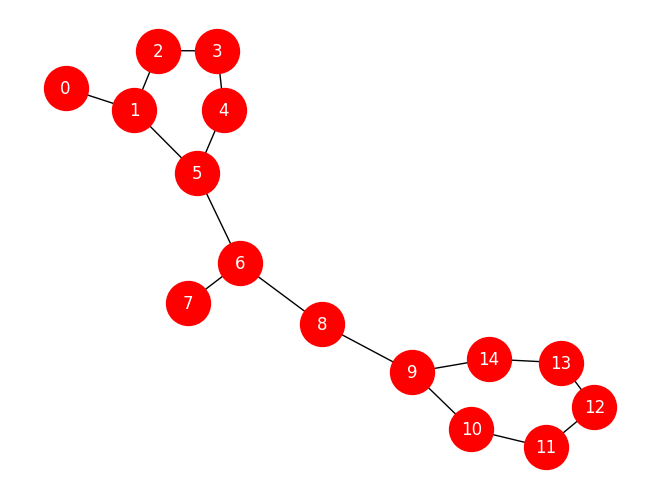

In [22]:
def create_graph_from_smiles(molecule_name, smiles):
  """
  """
  graph = nx.Graph()
  molecule = Chem.MolFromSmiles(smiles)

  # Add nodes - each atom is a node
  for atom in molecule.GetAtoms():
    graph.add_node(atom.GetIdx(), symbol=atom.GetSymbol())

  for bond in molecule.GetBonds():
    bond_type = str(bond.GetBondType())[0]
    graph.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), type=bond_type)

  graph.graph['name'] = molecule_name

  return graph

# Ensure that graph looks the same each time this cell is run
np.random.seed(291)

#graph = create_graph_from_smiles('Mark Roberts', 'CC(N)C(=O)O')
graph = create_graph_from_smiles('Mark Roberts', 'Cc1occc1C(=O)Nc2ccccc2')

nx.draw(graph,
        with_labels=True,
        node_color='red',
        node_size=1000,
        font_color='white')

print("********************")
for n,d in graph.nodes(data=True):
  print(n)
  print(d)
  print("....")

print("********************")

print(graph.nodes[0])
print(graph.edges[(0,1)])
print(graph.graph)

In [ ]:
#
